In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [71]:
# load the dataset to pandas Data Frame
raw_mail_data = pd.read_csv('https://raw.githubusercontent.com/harinyadevi/svm-email-spam-classification/main/spam.csv')
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
mail_data.shape
mail_data.head() #sample data

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
# label spam mail as 0; Non-spam mail (ham) mail as 1.
mail_data.loc[mail_data['Label'] == 'spam', 'Label',] = 0
mail_data.loc[mail_data['Label'] == 'ham', 'Label',] = 1

In [73]:
# separate the data as text and label. X --> Email; Y --> label
X = mail_data['EmailText'].values
Y = mail_data['Label'].values
print(X)
print('.............')
print(Y)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
.............
[1 1 0 ... 1 1 1]


In [74]:
#Train Test Split
# split the data as train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=3)

In [75]:
#Feature Extraction
# transform the text data to feature vectors that can be used as input to the SVM model using TfidfVectorizer
# convert the text to lower case letters
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [76]:
#convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

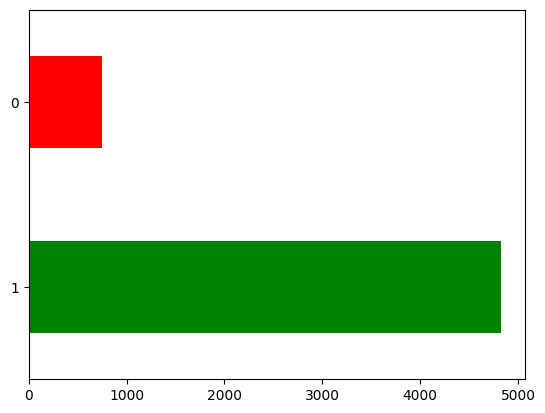

In [77]:
n=pd.value_counts(mail_data["Label"], sort= True)
n.plot(kind= 'barh', color= ["green", "red"])
#plt.title('Bar chart')
plt.show()

In [78]:
# training the support vector machine model with training data
model = LinearSVC()
model.fit(X_train_features, Y_train)

LinearSVC()

In [79]:
#Evaluation of the model
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9995512676688355


In [80]:
#Prediction on new mail
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]
# convert text to feature vectors
input_mail_features = feature_extraction.transform(input_mail)

In [81]:
#making prediction
prediction = model.predict(input_mail_features)
print(prediction)

[1]


In [82]:
if (prediction[0]==1):
  print('HAM MAIL')
else:
  print('SPAM MAIL')

HAM MAIL


In [86]:
#Prediction on new mail
input_mail = ["for FREE makeup accessories just text \Help\" to 853575321. Then every week get a new tone. 0870737910216yrs only."]
# convert text to feature vectors
input_mail_features = feature_extraction.transform(input_mail)

prediction = model.predict(input_mail_features)
print(prediction)

if (prediction[0]==1):
  print('HAM MAIL')
else:
  print('SPAM MAIL')

[0]
SPAM MAIL
